<a href="https://colab.research.google.com/github/IT21174230/ML-Journey/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLP FOR BINARY CLASS CLASSIFICATION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd

csv_file_path='/content/drive/MyDrive/heart.csv'

In [9]:
df=pd.read_csv(csv_file_path)
X=df.drop(columns=['output'])
y=df['output']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y,test_size=0.25, random_state=42)
# results in pandas dataframes

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227, 13)
(227,)
(76, 13)
(76,)


In [11]:
print(y_train)

287    0
282    0
197    0
158    1
164    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 227, dtype: int64


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
history=model.fit(
    x=X_train,
    y=y_train,
    epochs=50,
    validation_data=(X_test, y_test)
)

Epoch 1/50
8/8 [==============================] - 1s 20ms/step - loss: 0.3932 - accuracy: 0.8370 - val_loss: 0.3741 - val_accuracy: 0.8684
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3746 - accuracy: 0.8546 - val_loss: 0.3773 - val_accuracy: 0.8947
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.8458 - val_loss: 0.3947 - val_accuracy: 0.8553
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3653 - accuracy: 0.8326 - val_loss: 0.3882 - val_accuracy: 0.8553
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3610 - accuracy: 0.8414 - val_loss: 0.3818 - val_accuracy: 0.8684
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.8370 - val_loss: 0.3884 - val_accuracy: 0.8684
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3649 - accuracy: 0.8458 - val_loss: 0.3763 - val_accuracy: 0.8947
Epoch 8/50
8/8 [=================

In [29]:
test_loss, test_acc=model.evaluate(X_test, y_test)

print(f"Test Loss :{test_loss}\nTest Accuracy:{test_acc}")

3/3 [==============================] - 0s 4ms/step - loss: 0.3871 - accuracy: 0.8553
Test Loss :0.3870636224746704
Test Accuracy:0.8552631735801697


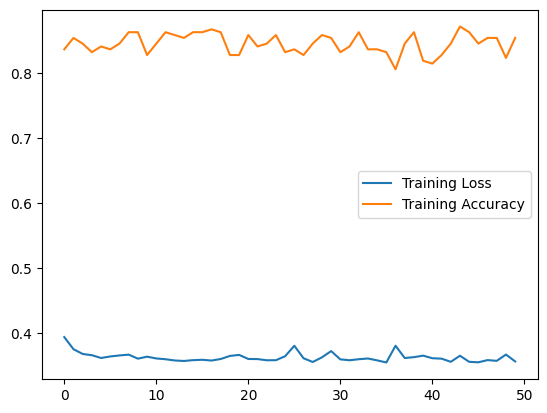

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()